In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, make_scorer

In [2]:
df = pd.read_csv(r"spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
print(df['Category'].value_counts())

ham     4825
spam     747
Name: Category, dtype: int64


In [4]:
df.dtypes

Category    object
Message     object
dtype: object

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens if token.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# Apply preprocessing function to the 'Text' column
df['Message'] = df['Message'].apply(lambda x: preprocess_text(x))
df

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,nd time tried contact u pound prize claim ea...
5568,ham,b going esplanade fr home
5569,ham,pity mood suggestions
5570,ham,guy bitching acted like interested buying some...


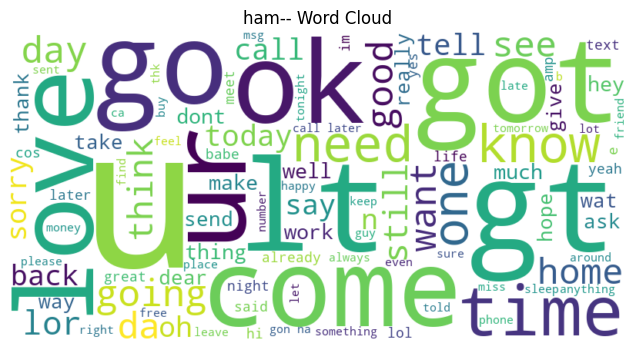

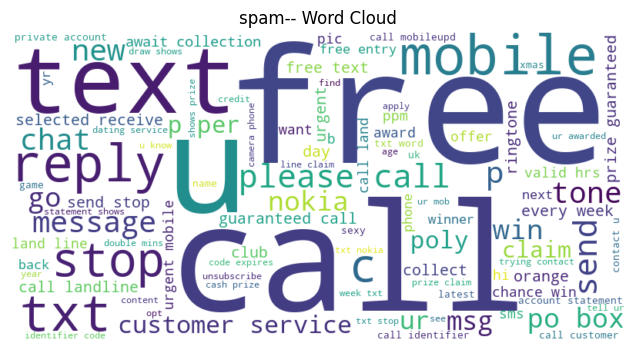

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Extract unique labels
unique_labels = df['Category'].unique()

# Step 2: Concatenate text for each unique label
text_per_label = {}
for label in unique_labels:
    concatenated_text = ' '.join(df[df['Category'] == label]['Message'])
    text_per_label[label] = concatenated_text

# Step 3: Generate word cloud for each unique label
for label, text in text_per_label.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(label + '-- Word Cloud')
    plt.axis('off')
    plt.show()


In [8]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Message'])
y = df["Category"]

In [9]:
import joblib
joblib.dump(vectorizer, 'rf_vectorizer1.pkl')

['rf_vectorizer1.pkl']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df["Category"], test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predict labels for train data
y_train_pred = clf.predict(X_train)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_class_report = classification_report(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Print evaluation metrics for train data
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("Classification Report:\n", train_class_report)
print("Confusion Matrix:\n", train_conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3859
        spam       1.00      1.00      1.00       598

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

Confusion Matrix:
 [[3859    0]
 [   0  598]]


In [12]:
# Create a DataFrame for test data
train_df = pd.DataFrame({'Message': X_train, 'Category': y_train, 'Predicted_Category': y_train_pred})

# Filter out wrongly classified instances
wrongly_classified = train_df[train_df['Category'] != train_df['Predicted_Category']]

# Filter out wrongly classified instances
wrongly_classified_indices = wrongly_classified.index.tolist()

# Print wrongly classified instances with actual message
print("Wrongly Classified Instances with Actual Message:\n\n")
for index in wrongly_classified_indices:
    message = df.loc[index, 'Message']
    true_label = df.loc[index, 'Category']
    predicted_label = wrongly_classified.loc[index, 'Predicted_Category']
    print("Message:", message)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print()

Wrongly Classified Instances with Actual Message:




In [13]:
# Predict labels for test data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.97847533632287
Precision: 0.9789971463514063
Recall: 0.97847533632287
F1 Score: 0.9776647034738051
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[966   0]
 [ 24 125]]


In [14]:
# Create a DataFrame for test data
test_df = pd.DataFrame({'Message': X_test, 'Category': y_test, 'Predicted_Category': y_pred})

# Filter out wrongly classified instances
wrongly_classified = test_df[test_df['Category'] != test_df['Predicted_Category']]

# Filter out wrongly classified instances
wrongly_classified_indices = wrongly_classified.index.tolist()

# Print wrongly classified instances with actual message
print("Wrongly Classified Instances with Actual Message:\n\n")
for index in wrongly_classified_indices:
    message = df.loc[index, 'Message']
    true_label = df.loc[index, 'Category']
    predicted_label = wrongly_classified.loc[index, 'Predicted_Category']
    print("Message:", message)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print()

Wrongly Classified Instances with Actual Message:


Message: guess somebody know secretly fancies wan na find give us call  landline dateboxessexcmxn 
True Label: spam
Predicted Label: ham

Message: oh god found number glad text back xafter msgs cst std ntwk chg
True Label: spam
Predicted Label: ham

Message: next amazing xxx picsfree video sent enjoy one vid enough day text back keyword picsfree get next video
True Label: spam
Predicted Label: ham

Message: rock yr chik get  filthy films xxx pics yr phone rply filth saristar ltd e yt  p per  days stop cancel
True Label: spam
Predicted Label: ham

Message: babe u want dont u baby im nasty thing  filthyguys fancy rude time sexy bitch go slo n hard txt xxx slo msgs
True Label: spam
Predicted Label: ham

Message: want cock hubby away need real man  satisfy txt wife  strings action txt stop  end txt rec otbox  la ws
True Label: spam
Predicted Label: ham

Message: hello darling today would love chat dont tell look like sexy
True Label: spam

In [15]:
joblib.dump(clf, 'rf_classifier_model1.pkl')

['rf_classifier_model1.pkl']

In [16]:
# Function to predict label and confidence score for a single image
def predict_label_with_confidence(message):
    text = preprocess_text(message)
    X = vectorizer.transform([text])
    label_probs = clf.predict_proba(X)[0]
    predicted_label_index = label_probs.argmax()
    predicted_label = clf.classes_[predicted_label_index]
    confidence_score = label_probs[predicted_label_index]
    return predicted_label, confidence_score

In [17]:
print(predict_label_with_confidence("Hi"))

('ham', 1.0)


In [19]:
print(predict_label_with_confidence("Congratulations! Your credit score entitles you to a no-interest Visa credit card. Click here to claim: [Link]"))

('spam', 0.61)


This contains a text classification model aimed at identifying spam disaster tweets. The dataset used for training is imbalanced, with a majority of ham messages compared to spam messages. Consequently, the model tends to misclassify many spam messages as ham due to the bias in the data distribution. To address this issue, additional spam rows have been added to the dataset to balance its class distribution.